# **Question 1**

(40 points). Write a python program to collect text data from **either of the following sources** and save the data into a **csv file**:

(1) Collect all the customer reviews of the product [2019 Dell labtop](https://www.amazon.com/Dell-Inspiron-5000-5570-Laptop/dp/B07N49F51N/ref=sr_1_11?crid=1IJ7UWF2F4GHH&keywords=dell%2Bxps%2B15&qid=1580173569&sprefix=dell%2Caps%2C181&sr=8-11&th=1) on amazon.

(2) Collect the top 100 User Reviews of the film [Joker](https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv) from IMDB.

(3) Collect the abstracts of the top 100 research papers by using the query [natural language processing](https://citeseerx.ist.psu.edu/search?q=natural+language+processing&submit.x=0&submit.y=0&sort=rlv&t=doc) from CiteSeerX.

(4) Collect the top 100 tweets by using hashtag ["#wuhancoronovirus"](https://twitter.com/hashtag/wuhancoronovirus) from Twitter. 


In [0]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.1 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://security.ubuntu.com/ubuntu bionic-security/restri

In [0]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')
# browser.get("https://www.python.org/")
# nav = browser.find_element_by_id("mainnav")
# print(nav.text)

In [0]:
#2
driver = webdriver.Chrome('chromedriver',options=options)
import pandas as pd
import time
reviews=[]
username=[]
date=[]
#titles_l=[]
driver.get('https://www.imdb.com/title/tt7286456/reviews?sort=helpfulnessScore&dir=desc&ratingFilter=10')
for i in range(3):
  button=driver.find_element_by_xpath('/html[1]/body[1]/div[3]/div[1]/div[2]/div[3]/div[1]/section[1]/div[2]/div[4]/div[1]/button[1]').click()
  time.sleep(3)
items=driver.find_elements_by_class_name("content")
for item in items:
  reviews.append(item.find_element_by_css_selector('.text.show-more__control').text)
users=driver.find_elements_by_class_name("display-name-date")
for user in users:
  username.append(user.find_element_by_tag_name('a').text)
  date.append(user.find_element_by_class_name('review-date').text)
titles=driver.find_elements_by_class_name("lister-item-content")
#for title in titles:
 # titles_l.append(title.find_element_by_tag_name('a').text)
reviews_df=pd.DataFrame(reviews, columns = ['Review'])
username_df=pd.DataFrame(username, columns = ['Username'])
date_df=pd.DataFrame(date, columns = ['Date'])
#titles_df=pd.DataFrame(titles_l, columns = ['Title'])
joker_data=pd.concat([date_df,username_df,reviews_df],axis=1)
joker_data.to_csv('output2.csv')
joker_data

,Date,Username,Review
0,10 September 2019,JF500,I was a person that saw all the hype and claim...
1,3 October 2019,MihaVrhunc,"Every once in a while a movie comes, that trul..."
2,7 October 2019,lesterarnoldpinto,This is a movie that only those who have felt ...
3,1 September 2019,Chandler_Bing_,"Truly a masterpiece, The Best film of 2019, on..."
4,4 October 2019,kdagoulis26,Most of the time movies are anticipated like t...
...,...,...,...
95,4 October 2019,UniqueParticle,"Best Joker adaption ever, everything dark you'..."
96,7 October 2019,david-sarkies,
97,1 September 2019,bbwilliams-16498,This movie is getting a lot of praise and this...
98,1 September 2019,lukamiminomiminoshvili,Phoenix is a best joker ever he deserved oscar...


**Here I am considering only review column for further processing...**

# **Question 2**

(30 points). Write a python program to **clean the text data** you collected above and save the data in a new column in the csv file. The data cleaning steps include:

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the [stopwords list](https://gist.github.com/sebleier/554280).

(4) Lowercase all texts

(5) Stemming. 

(6) Lemmatization.

In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [0]:
#2 --Data cleaning--
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
import pandas as pd
df = reviews_df['Review'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE).to_frame()# 1.removed noise (special characters and punctuations)
df=df['Review'].str.replace('[^\w\s]','').replace('\n','', regex=True).to_frame()
no_nums=df['Review'].str.replace('\d+', '').to_frame()   # 2.Removed Numbers
lower = no_nums['Review'].str.lower().to_frame()  # 4.converted to lower case letters
stemmed=[]
lemmatized=[]
sentence=[]
stop_words = set(stopwords.words('english')) 
listed=lower['Review'].values.tolist()
for i in listed:
   word_tokens = word_tokenize(i) 
   filtered_sentence = [w for w in word_tokens if not w in stop_words] 
   filtered_sentence = []
   for w in word_tokens: 
     if w not in stop_words: 
         filtered_sentence.append(w)     # 3. Removed stop words
   sentence.append(' '.join(filtered_sentence))
ps = PorterStemmer() 
stemmed = []
for s in sentence:
    stemmed.append(" ".join([ps.stem(i) for i in s.split()]))       #5.Stemming
lemmatizer = WordNetLemmatizer() 
lemmatized=[]
for m in stemmed:
  lemmatized.append(" ".join([lemmatizer.lemmatize(i) for i in m.split()]))     #6.lemmatization
lemmatized_df=pd.DataFrame(lemmatized,columns=['Cleaned_data'])
#lemmatized_df.to_csv('Cleaned_data.csv')
df_csv = pd.read_csv('output2.csv')
# provided that their lengths match
df_csv['Cleaned_Review_column'] = lemmatized_df['Cleaned_data']
df_csv.to_csv('cleaned.csv')

**There are very few missing fields in data which represents spoilers.**

# **Question 3**

(30 points). Write a python program to conduct **syntax and structure analysis** of the clean text you just saved above. The syntax and structure analysis includes: 

(1) Parts of Speech (POS) Tagging: Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) Constituency Parsing and Dependency Parsing: print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) Named Entity Recognition: Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

In [0]:
#3.1
pos=[]
count=0
for i in lemmatized:
  text = word_tokenize(i)
  count=count+1
  pos.append(nltk.pos_tag(text))    #Parts of Speech for each sentence
pos
#len(pos)

[[('person', 'NN'),
  ('saw', 'VBD'),
  ('hype', 'JJ'),
  ('claim', 'NN'),
  ('masterpiec', 'NN'),
  ('overreact', 'JJ'),
  ('overblown', 'JJ'),
  ('excit', 'NN'),
  ('anoth', 'DT'),
  ('joker', 'NN'),
  ('base', 'NN'),
  ('film', 'NN'),
  ('thought', 'VBD'),
  ('look', 'NN'),
  ('solid', 'JJ'),
  ('best', 'RB'),
  ('even', 'RB'),
  ('bit', 'VB'),
  ('pretenti', 'JJ'),
  ('trailer', 'NNS'),
  ('say', 'VBP'),
  ('incred', 'VBN'),
  ('wrong', 'JJ'),
  ('massiv', 'NN'),
  ('achiev', 'NN'),
  ('cinema', 'NN'),
  ('that', 'WDT'),
  ('extrem', 'VBZ'),
  ('rare', 'JJ'),
  ('day', 'NN'),
  ('age', 'NN'),
  ('cgi', 'NN'),
  ('nonsens', 'NNS'),
  ('reboot', 'VBP'),
  ('somewhat', 'RB'),
  ('reboot', 'JJ'),
  ('sort', 'NN'),
  ('standalon', 'NN'),
  ('origin', 'NN'),
  ('tale', 'NN'),
  ('impecc', 'JJ'),
  ('start', 'JJ'),
  ('finish', 'NN'),
  ('echo', 'NN'),
  ('resembl', 'NN'),
  ('best', 'JJS'),
  ('joker', 'NN'),
  ('origin', 'NN'),
  ('comic', 'JJ'),
  ('past', 'NN'),
  ('joaquin', 'NN'),
 

In [0]:
#3.1
from collections import Counter
pos_counts=[]
lines=0
for j in pos:
  lines=lines+1
  counts = Counter(tag for word,tag in j)             #Number of POS in each sentence.
  pos_counts.append(str(lines)+" "+str(counts))
pos_counts

["1 Counter({'NN': 52, 'JJ': 19, 'RB': 6, 'VBP': 6, 'VB': 3, 'NNS': 3, 'VBN': 3, 'VBD': 2, 'JJS': 2, 'MD': 2, 'DT': 1, 'WDT': 1, 'VBZ': 1, 'IN': 1})",
 "2 Counter({'NN': 27, 'JJ': 9, 'RB': 3, 'VBP': 3, 'NNS': 1, 'IN': 1, 'JJS': 1, 'VB': 1, 'VBN': 1})",
 "3 Counter({'NN': 20, 'JJ': 7, 'VBP': 4, 'IN': 3, 'VBD': 1, 'CD': 1, 'RBR': 1, 'RB': 1, 'VB': 1})",
 "4 Counter({'NN': 20, 'JJ': 10, 'JJS': 3, 'VBP': 2, 'NNS': 1, 'CD': 1, 'VBG': 1})",
 "5 Counter({'NN': 24, 'JJ': 12, 'VBP': 3, 'NNS': 2, 'IN': 1, 'JJS': 1, 'VBN': 1, 'RB': 1, 'JJR': 1})",
 "6 Counter({'NN': 27, 'JJ': 8, 'VBD': 4, 'VB': 3, 'IN': 3, 'FW': 1, 'VBP': 1, 'RB': 1})",
 "7 Counter({'NN': 37, 'JJ': 17, 'VB': 5, 'RB': 4, 'VBD': 3, 'VBP': 3, 'FW': 1, 'JJS': 1, 'IN': 1, 'VBG': 1, 'RBS': 1})",
 "8 Counter({'NN': 17, 'VB': 4, 'JJ': 4, 'VBP': 2, 'MD': 1, 'VBN': 1, 'RB': 1, 'IN': 1})",
 "9 Counter({'NN': 73, 'JJ': 31, 'RB': 8, 'VBP': 6, 'JJS': 4, 'IN': 3, 'NNS': 3, 'VBN': 2, 'VB': 2, 'VBZ': 2, 'MD': 1, 'VBD': 1, 'VBG': 1, 'WP': 1})",
 "

In [0]:
#3.2
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


**Here we have to download stanford parser.zip file, extract it and place it in application directory**

In [0]:
#3.2
from zipfile import ZipFile
with ZipFile('/stanford-parser-full-2015-04-20.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/stanfordparser')

In [0]:
#3.2
from IPython.display import display     #Constituency trees for sentences
from nltk.parse.stanford import StanfordParser
scp = StanfordParser(path_to_jar='/stanfordparser/stanford-parser-full-2015-04-20/stanford-parser.jar',
                     path_to_models_jar='/stanfordparser/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')
list_loc2=[10,20,30,40,50,60,70,80,90,100]
list_loc1=[0,10,20,30,40,50,60,70,80,90]
number=0
for i in list_loc1:
  for r in list_loc2:
    for text in lemmatized[i:r]:
      try:
        
        print('\n\nConstituency tree for sentence-'+str(number)+'\n')
        result = list(scp.raw_parse(text))
        print(result[0])
        number=number+1
        #print(text)
      except:
        #print('\n\nConstituency tree for sentence-'+str(number)+'\n\n')
        print("Spoiler Content --No Parse Tree For this Field--")
        number=number+1
        continue
    list_loc2.remove(r)
    break
    list_loc2.remove(i)


Streaming output truncated to the last 5000 lines.
                                                                  (NN
                                                                    uncomfort))
                                                                (PP
                                                                  (IN
                                                                    like)
                                                                  (NP
                                                                    (JJ
                                                                      someth)
                                                                    (NN
                                                                      horribl))))
                                                              (VP
                                                                (VBP
                                                                  happen)
    

In [0]:
#3.2
from nltk.parse.stanford import StanfordDependencyParser   #Dependency trees for sentences
sdp = StanfordDependencyParser(path_to_jar='/stanfordparser/stanford-parser-full-2015-04-20/stanford-parser.jar',
                     path_to_models_jar='/stanfordparser/stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')    
list_loc2=[10,20,30,40,50,60,70,80,90,100]
list_loc1=[0,10,20,30,40,50,60,70,80,90]
number=0
for i in list_loc1:
  for r in list_loc2:
    for text in lemmatized[i:r]:
      try:
        print('\n\nDependency tree for sentence-'+str(number)+'\n')
        result = list(sdp.raw_parse(text))  
        # print the dependency tree
        dep_tree = [parse.tree() for parse in result][0]
        print(dep_tree)
        number=number+1
      except:
        print("Spoiler Content --No Parse Tree For this Field--")
        number=number+1
        continue
    list_loc2.remove(r)
    break
    list_loc2.remove(i)



Dependency tree for sentence-0

(saw
  person
  (claim
    hype
    (thought
      (film (overreact masterpiec) overblown excit anoth joker base)
      (look
        (solid best)
        (say
          (trailer even bit pretenti)
          (cinema (wrong incred) massiv achiev)))
      (exist
        that
        (nonsens
          extrem
          rare
          day
          age
          cgi
          (reboot
            (tale
              somewhat
              reboot
              sort
              standalon
              origin
              (echo
                (finish impecc start)
                (perform
                  (dedic
                    (resembl best)
                    joker
                    origin
                    comic
                    past
                    joaquin
                    bleed
                    sweat
                    cri
                    everi
                    drop
                    magnific)
                  (proud


**Write your explanations of the constituency parsing tree and dependency parsing tree here (Question 3-2):** 

**Constituency parsing:**
1)After recognizing a sentence assigning it a syntactic structure according to phrase structure grammar.
2)Interior nodes are label by non terminals while exterior nodes are terminals.
3)For a sentence there is only one root node.
4)A branch node connects two or more child nodes.

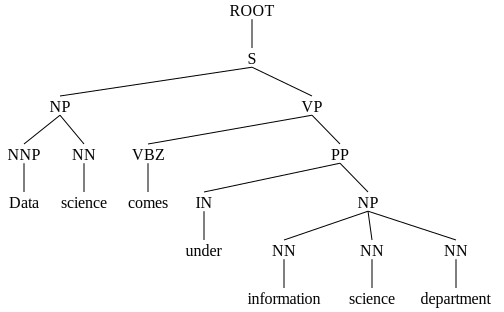

In [0]:
#Example for constituency parsing
!pip install svgling
import svgling
text_for_ex='Data science comes under information science department'
result = list(scp.raw_parse(text_for_ex))
svgling.draw_tree(result[0])

**Dependency parsing:**
1)Here all nodes are terminals.They do not distinuguish themselves as terminals and non-terminals.
2)Parse tree lacks the intermediate phrasal categories which is seen in constituency trees(NNP,NN,VBZ,IN..)
3)These trees are draw based on dependency grammars.
**Dependency grammars:**
4)For every word in a sentence there is exactly one node in structure of sentence that corresponds to the word.

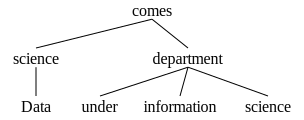

In [0]:
#Example for dependency parsing
result = list(sdp.raw_parse(text_for_ex))  
dep_tree = [parse.tree() for parse in result][0]
svgling.draw_tree(dep_tree)

In [0]:
#3.3
pip install spacy

**Spacy models are statistical. So the named entities that these models recognize are dependent on the data sets that these models were trained on.**

In [0]:
#3.3
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
number=0
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    for key, value in freq.items(): 
      print ("% s : % s"%(key, value))
for data in lemmatized:
  print('\n\nSentence number:',number)
  number=number+1
  doc = nlp(data)
  if not doc.ents:
    print ('------No named entities were recognized in the input text---------')
  else:
    counts=[]
    for entity in doc.ents:
      print(entity.label_, ' | ', entity.text)
      #labels = [x.label_ for x in article.ents]
      counts.append(entity.label_)
      #print(counts)
    print('Count of each entity in sentence->')  
    CountFrequency(counts) 



Sentence number: 0
------No named entities were recognized in the input text---------


Sentence number: 1
------No named entities were recognized in the input text---------


Sentence number: 2
CARDINAL  |  one
Count of each entity in sentence->
CARDINAL : 1


Sentence number: 3
CARDINAL  |  one
Count of each entity in sentence->
CARDINAL : 1


Sentence number: 4
ORDINAL  |  first
Count of each entity in sentence->
ORDINAL : 1


Sentence number: 5
------No named entities were recognized in the input text---------


Sentence number: 6
------No named entities were recognized in the input text---------


Sentence number: 7
------No named entities were recognized in the input text---------


Sentence number: 8
DATE  |  yesterday
Count of each entity in sentence->
DATE : 1


Sentence number: 9
------No named entities were recognized in the input text---------


Sentence number: 10
------No named entities were recognized in the input text---------


Sentence number: 11
------No named enti

**We can also tag the named entites of each word using stanfordtagger. For this we need to download the the library and place it in application directory and then access it as below..**

In [0]:
#second method for 3.3
with ZipFile('/stanford-ner-2018-10-16.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/stanfordner')

In [0]:
#second method for 3.3
import nltk
from nltk.tag.stanford import StanfordNERTagger
jar = '/stanfordner/stanford-ner-2018-10-16/stanford-ner.jar'
model = '/stanfordner/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz'
line=0
# Prepare NER tagger with english model
ner_tagger = StanfordNERTagger(model, jar, encoding='utf8')

# Tokenize: Split sentence into words
for i in lemmatized:
  words = nltk.word_tokenize(i)
  print('\n\nSentence number-',line)
  line=line+1
# Run NER tagger on words
  print(ner_tagger.tag(words))

/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)




Sentence number- 0
[('person', 'O'), ('saw', 'O'), ('hype', 'O'), ('claim', 'O'), ('masterpiec', 'O'), ('overreact', 'O'), ('overblown', 'O'), ('excit', 'O'), ('anoth', 'O'), ('joker', 'O'), ('base', 'O'), ('film', 'O'), ('thought', 'O'), ('look', 'O'), ('solid', 'O'), ('best', 'O'), ('even', 'O'), ('bit', 'O'), ('pretenti', 'O'), ('trailer', 'O'), ('say', 'O'), ('incred', 'O'), ('wrong', 'O'), ('massiv', 'O'), ('achiev', 'O'), ('cinema', 'O'), ('that', 'O'), ('extrem', 'O'), ('rare', 'O'), ('day', 'O'), ('age', 'O'), ('cgi', 'O'), ('nonsens', 'O'), ('reboot', 'O'), ('somewhat', 'O'), ('reboot', 'O'), ('sort', 'O'), ('standalon', 'O'), ('origin', 'O'), ('tale', 'O'), ('impecc', 'O'), ('start', 'O'), ('finish', 'O'), ('echo', 'O'), ('resembl', 'O'), ('best', 'O'), ('joker', 'O'), ('origin', 'O'), ('comic', 'O'), ('past', 'O'), ('joaquin', 'O'), ('bleed', 'O'), ('sweat', 'O'), ('cri', 'O'), ('everi', 'O'), ('drop', 'O'), ('magnific', 'O'), ('dedic', 'O'), ('perform', 'O'), ('heath', 'O

**Using stanford tagger output is not upto the mark. We need to train the model with similar type of data for effective results.**